## **Ques.1**

1. Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale.
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.


About the data:

Let’s consider a Company dataset with around 10 variables and 400 records.

The attributes are as follows:

 Sales -- Unit sales (in thousands) at each location

 Competitor Price -- Price charged by competitor at each location

 Income -- Community income level (in thousands of dollars)

 Advertising -- Local advertising budget for company at each location (in thousands of dollars)

 Population -- Population size in region (in thousands)

 Price -- Price company charges for car seats at each site

 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

 Age -- Average age of the local population

 Education -- Education level at each location

 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this:


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing


import warnings
warnings.filterwarnings('ignore')


In [ ]:
company = pd.read_csv('/content/Company_Data.csv')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## EDA

In [ ]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
company.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [ ]:
company.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [ ]:
company.Sales.unique()

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  8.85, 13.39,  7.99,  9.46,  6.5 ,  5.52, 12.61,
        8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,  7.52, 11.62,  2.23,
        8.7 , 11.7 ,  6.56,  7.95,  5.33,  4.81,  4.53,  8.86,  8.39,
        5.58,  9.48,  7.45, 12.49,  4.88,  4.11,  5.3 ,  5.07,  4.62,
        5.55,  0.16,  3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,
        8.54,  8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,
        9.34, 11.27,  6.52,  4.96,  4.47,  8.41,  9.54,  7.62,  3.67,
        6.44,  5.17,

In [ ]:
company.groupby(['ShelveLoc','Urban','US']).count()

Sales  CompPrice  Income  Advertising  Population  Price  \
ShelveLoc Urban US                                                              
Bad       No    No      11         11      11           11          11     11   
                Yes     11         11      11           11          11     11   
          Yes   No      23         23      23           23          23     23   
                Yes     51         51      51           51          51     51   
Good      No    No       6          6       6            6           6      6   
                Yes     22         22      22           22          22     22   
          Yes   No      18         18      18           18          18     18   
                Yes     39         39      39           39          39     39   
Medium    No    No      29         29      29           29          29     29   
                Yes     39         39      39           39          39     39   
          Yes   No      55         55      55           55          55     55   
                Yes     96         96      96           96          96     96   

                     Age  Education  
ShelveLoc Urban US                   
Bad       No    No    11         11  
                Yes   11         11  
          Yes   No    23         23  
                Yes   51         51  
Good      No    No     6          6  
                Yes   22         22  
          Yes   No    18         18  
                Yes   39         39  
Medium    No    No    29         29  
                Yes   39         39  
          Yes   No    55         55  
                Yes   96         96

## Visualization

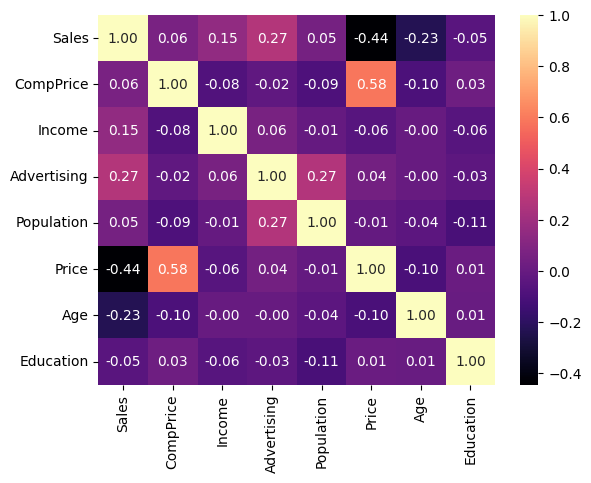

In [ ]:
# Heatmap for correlation
sns.heatmap(company.corr(), cmap='magma', annot=True, fmt='.2f')
plt.show()

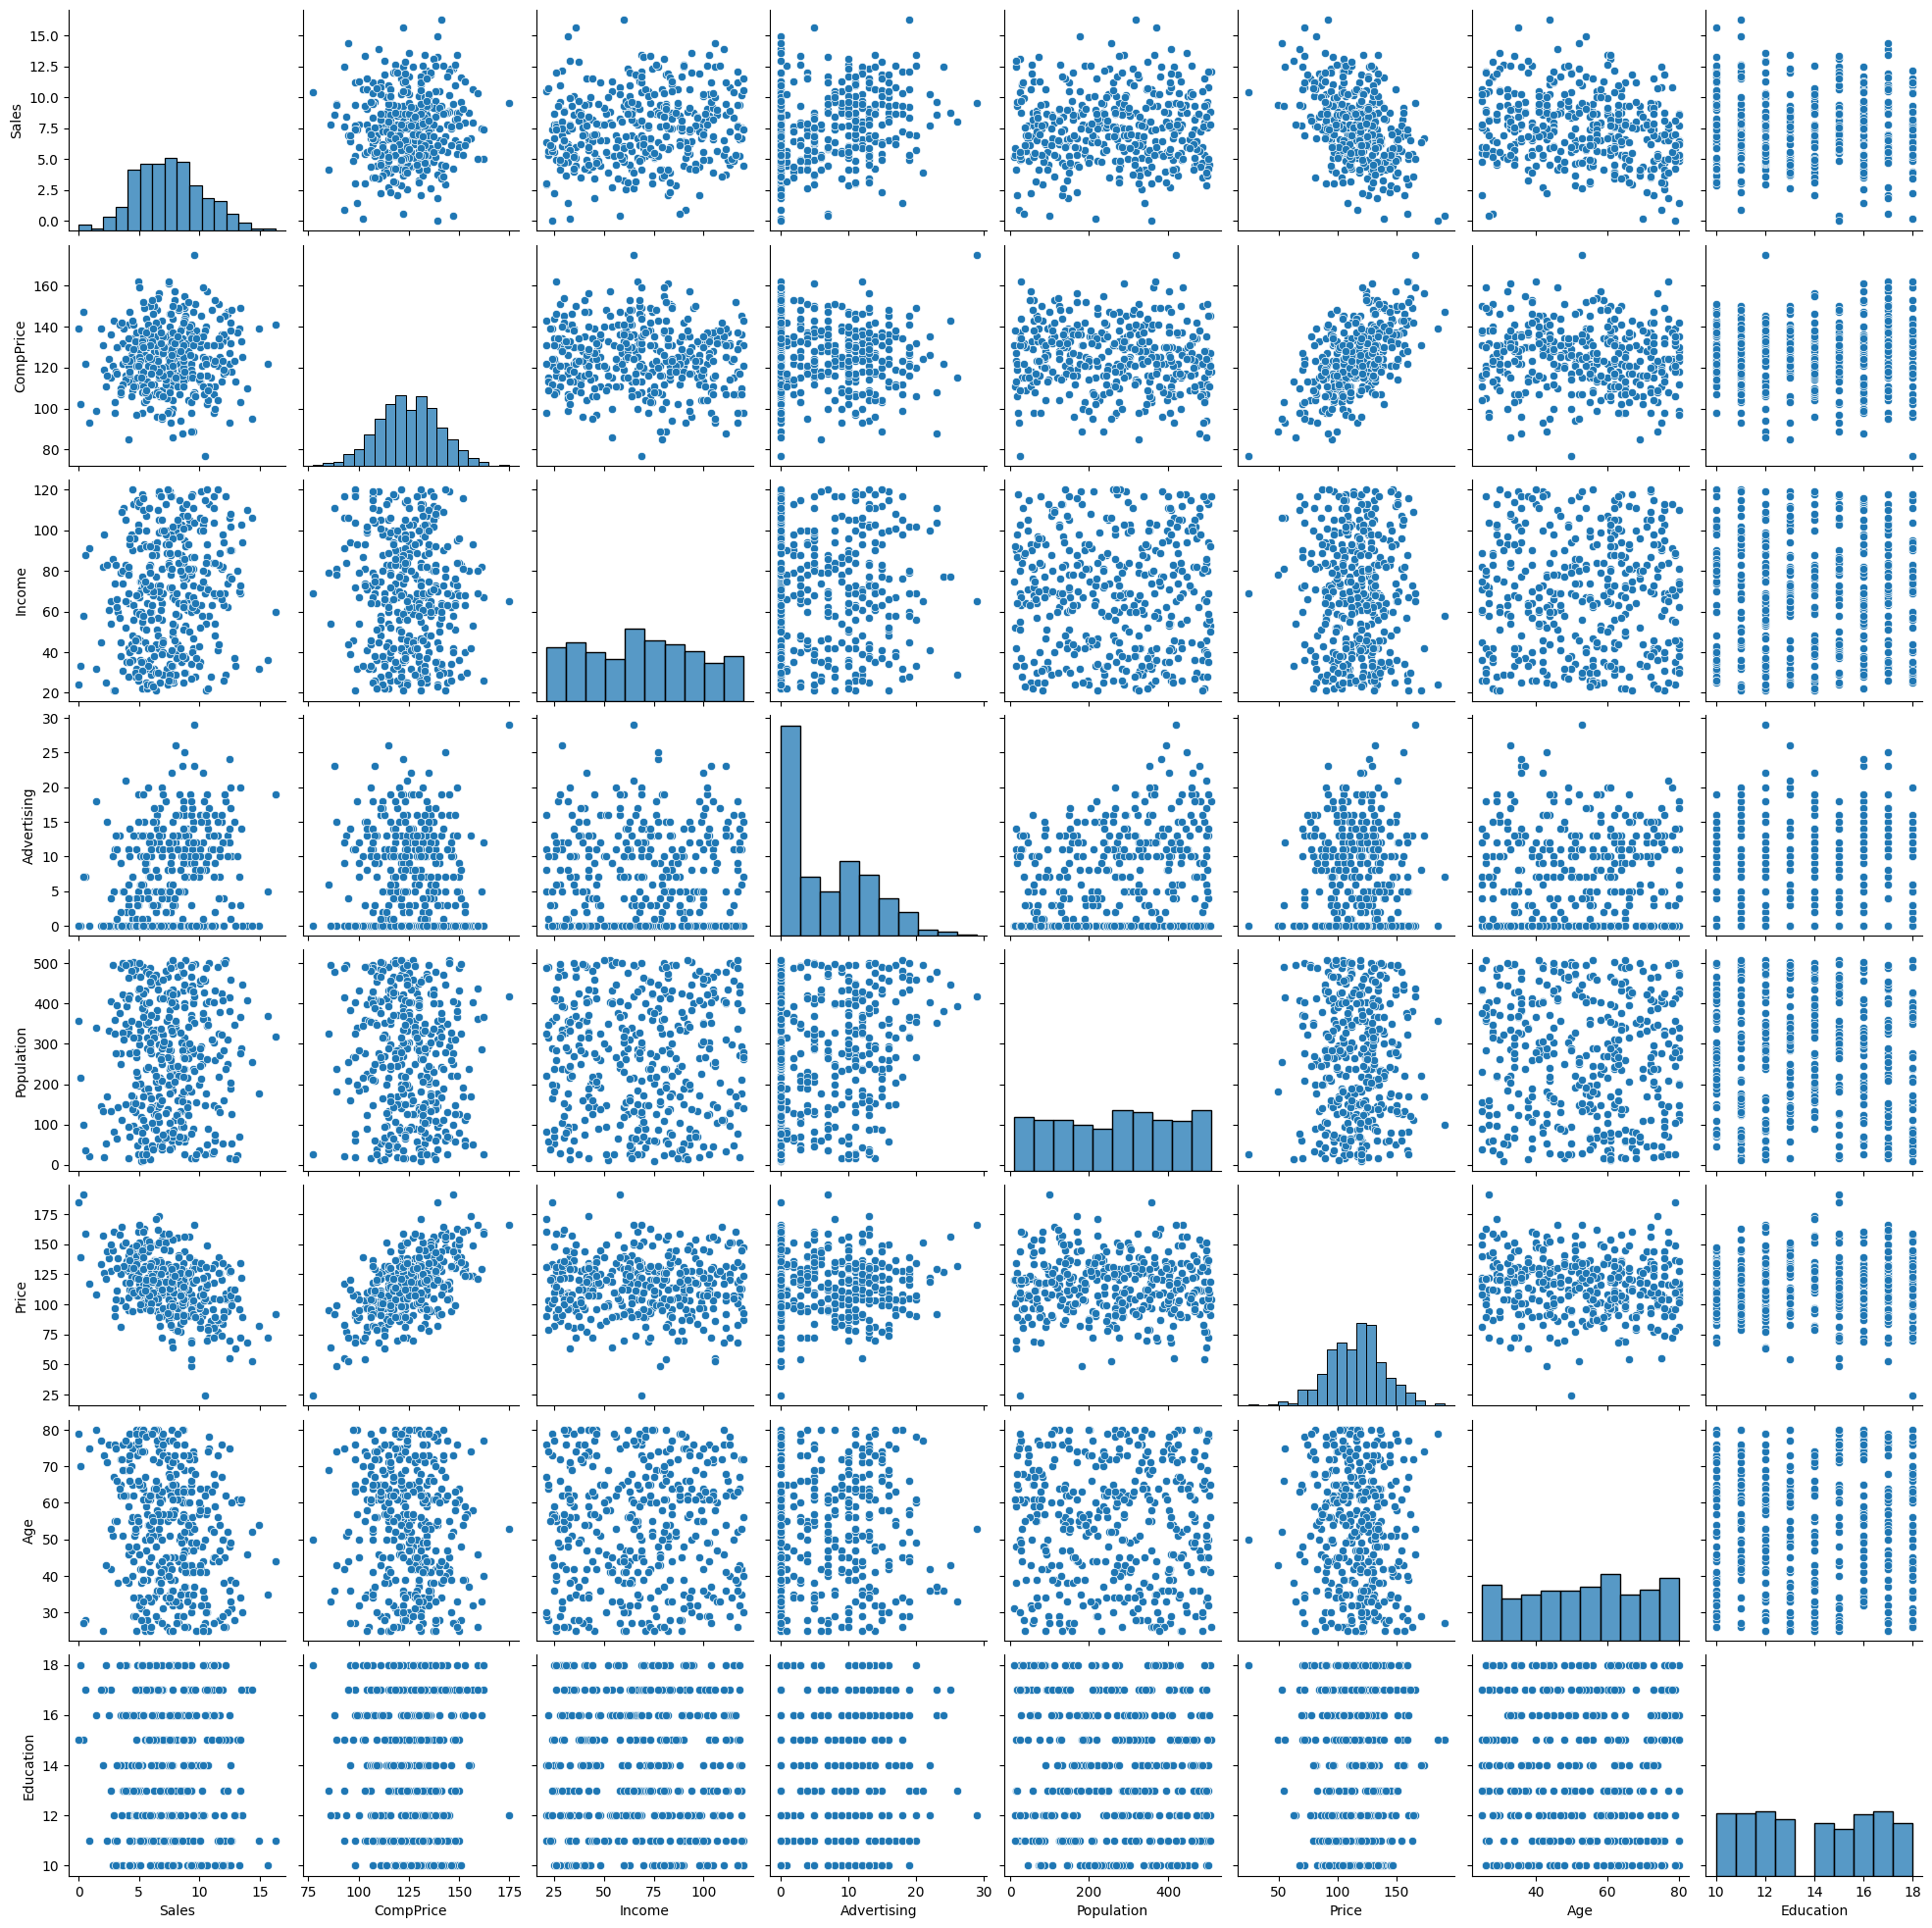

In [ ]:
sns.pairplot(data=company)

## Label Encoding

In [ ]:
label_encoder = preprocessing.LabelEncoder()
company['ShelveLoc']= label_encoder.fit_transform(company['ShelveLoc'])
company['Urban']= label_encoder.fit_transform(company['Urban'])
company['US']= label_encoder.fit_transform(company['US'])

In [ ]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int64  
 10  US           400 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 34.5 KB


In [ ]:
company['ShelveLoc'].unique()

array([0, 1, 2])

In [ ]:
company.ShelveLoc.value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

## Split data into X and Y

In [ ]:
x = company.iloc[:, 0:6]
y = company['ShelveLoc']

In [ ]:
x

,Sales,CompPrice,Income,Advertising,Population,Price
0,9.50,138,73,11,276,120
1,11.22,111,48,16,260,83
2,10.06,113,35,10,269,80
3,7.40,117,100,4,466,97
4,4.15,141,64,3,340,128
...,...,...,...,...,...,...
395,12.57,138,108,17,203,128
396,6.14,139,23,3,37,120
397,7.41,162,26,12,368,159
398,5.94,100,79,7,284,95


In [ ]:
y

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 400, dtype: int64

In [ ]:
colnames = list(company.columns)

In [ ]:
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [ ]:
# Splitting entire data into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=40)

In [ ]:
x_train.shape

(320, 6)

In [ ]:
x_test.shape

(80, 6)

## Building Desion Tree Classifier using Entropy Criteria

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

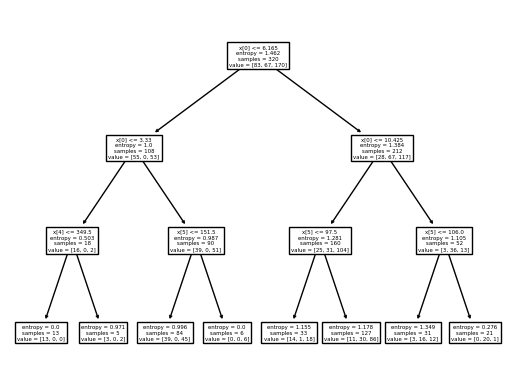

In [ ]:
# plot the decision tree
tree.plot_tree(model);

[Text(0.5, 0.875, 'Sales <= 6.165\nentropy = 1.462\nsamples = 320\nvalue = [83, 67, 170]\nclass = Medium'),
 Text(0.25, 0.625, 'Sales <= 3.33\nentropy = 1.0\nsamples = 108\nvalue = [55, 0, 53]\nclass = Bad'),
 Text(0.125, 0.375, 'Population <= 349.5\nentropy = 0.503\nsamples = 18\nvalue = [16, 0, 2]\nclass = Bad'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 13\nvalue = [13, 0, 0]\nclass = Bad'),
 Text(0.1875, 0.125, 'entropy = 0.971\nsamples = 5\nvalue = [3, 0, 2]\nclass = Bad'),
 Text(0.375, 0.375, 'Price <= 151.5\nentropy = 0.987\nsamples = 90\nvalue = [39, 0, 51]\nclass = Medium'),
 Text(0.3125, 0.125, 'entropy = 0.996\nsamples = 84\nvalue = [39, 0, 45]\nclass = Medium'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 6\nvalue = [0, 0, 6]\nclass = Medium'),
 Text(0.75, 0.625, 'Sales <= 10.425\nentropy = 1.384\nsamples = 212\nvalue = [28, 67, 117]\nclass = Medium'),
 Text(0.625, 0.375, 'Price <= 97.5\nentropy = 1.281\nsamples = 160\nvalue = [25, 31, 104]\nclass = Medium'),
 Text(

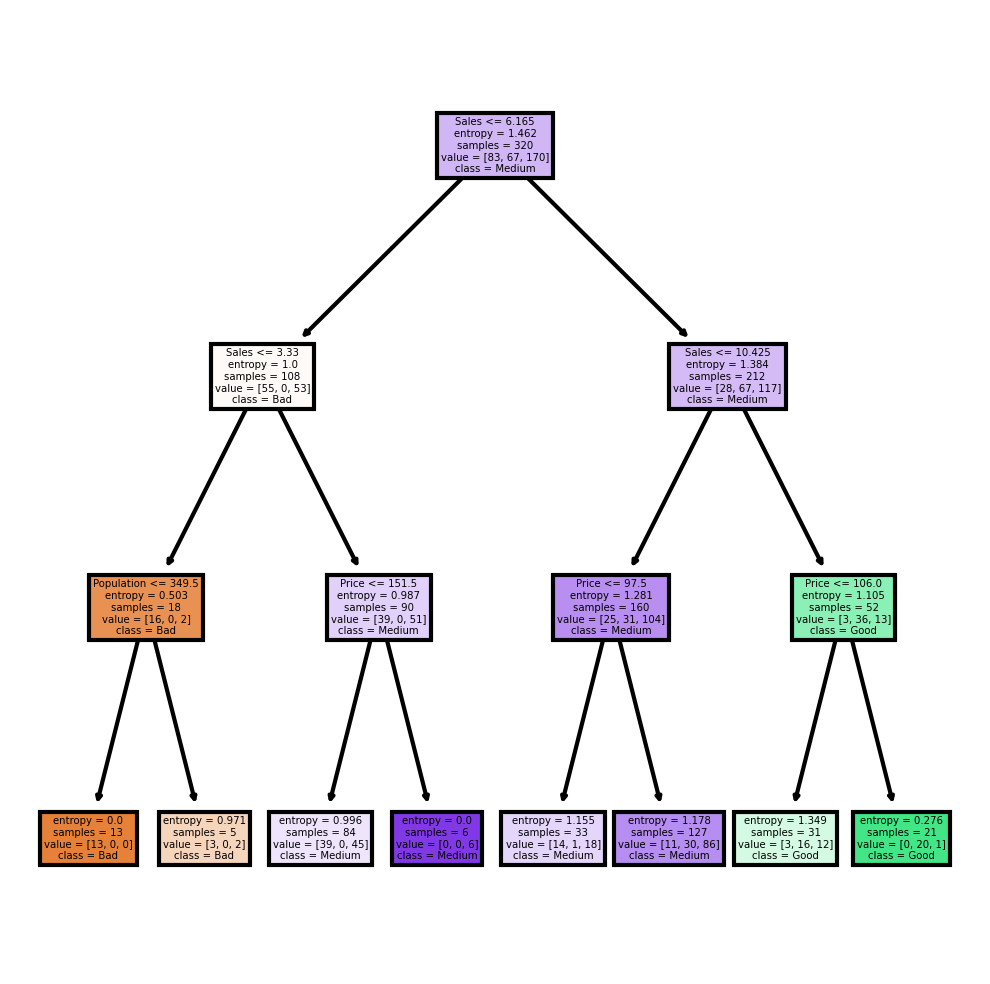

In [ ]:
fn = ['Sales','ComPrice','Income','Advertising','Population','Price']
cn = ['Bad','Good','Medium']
fig, axes = plt.subplots(nrows = 1, ncols=1, figsize= (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names = cn,
               filled = True)

In [ ]:
# predicting on test data
preds = model.predict(x_test)  # predicting on test data set
pd.Series(preds).value_counts()  # getting the count of each category

2    63
1    13
0     4
dtype: int64

In [ ]:
preds

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2])

In [ ]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
ShelveLoc,,,
0,1,0,12
1,0,8,10
2,3,5,41


In [ ]:
# Accuracy
np.mean(preds == y_test)

0.625

## Building Decision Tree Classifier(CART) using GINI Criteria

In [ ]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
# Prediction and computing the accuracy
pred = model.predict(x_test)
np.mean(preds == y_test)

0.625

## Decision Tree Regression Example

In [ ]:
array = company.values
x = array[:, 0:3]
y = array[:, 3]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Find the accuracy
model.score(x_test, y_test)

-0.95562496316813

## **Ques.2**

2. Use decision trees to prepare a model on fraud data
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person

Taxable.Income : Taxable income is the
amount of how much tax an individual owes to the government

Work Experience : Work experience of an individual person

Urban : Whether that person belongs to urban area or not

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor


import warnings
warnings.filterwarnings('ignore')

In [ ]:
fraud = pd.read_csv('/content/Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# EDA

In [ ]:
# checking for datatypes
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
# checking for null values
fraud.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [ ]:
# Creating dummy vairables for Categorical columns
fraud=pd.get_dummies(fraud,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [ ]:
fraud

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [ ]:
# Creating new column TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
fraud["TaxInc"] = pd.cut(fraud["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky","Good"])

In [ ]:
fraud.tail(10)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc
590,43018,85195,14,0,1,0,1,Good
591,27394,132859,18,1,0,1,1,Risky
592,68152,75143,16,1,0,1,0,Good
593,84775,131963,10,0,0,0,1,Good
594,47364,97526,9,0,1,0,1,Good
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good
599,96519,158137,16,0,0,0,0,Good


# Lets assume: taxable_income <= 30000 as "Risky=0" and others are "good=1"

In [ ]:
# Creating a new column
fraud= pd.get_dummies(fraud,columns = ["TaxInc"],drop_first=True)

In [ ]:
fraud.tail(10)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,43018,85195,14,0,1,0,1,1
591,27394,132859,18,1,0,1,1,0
592,68152,75143,16,1,0,1,0,1
593,84775,131963,10,0,0,0,1,1
594,47364,97526,9,0,1,0,1,1
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1
599,96519,158137,16,0,0,0,0,1


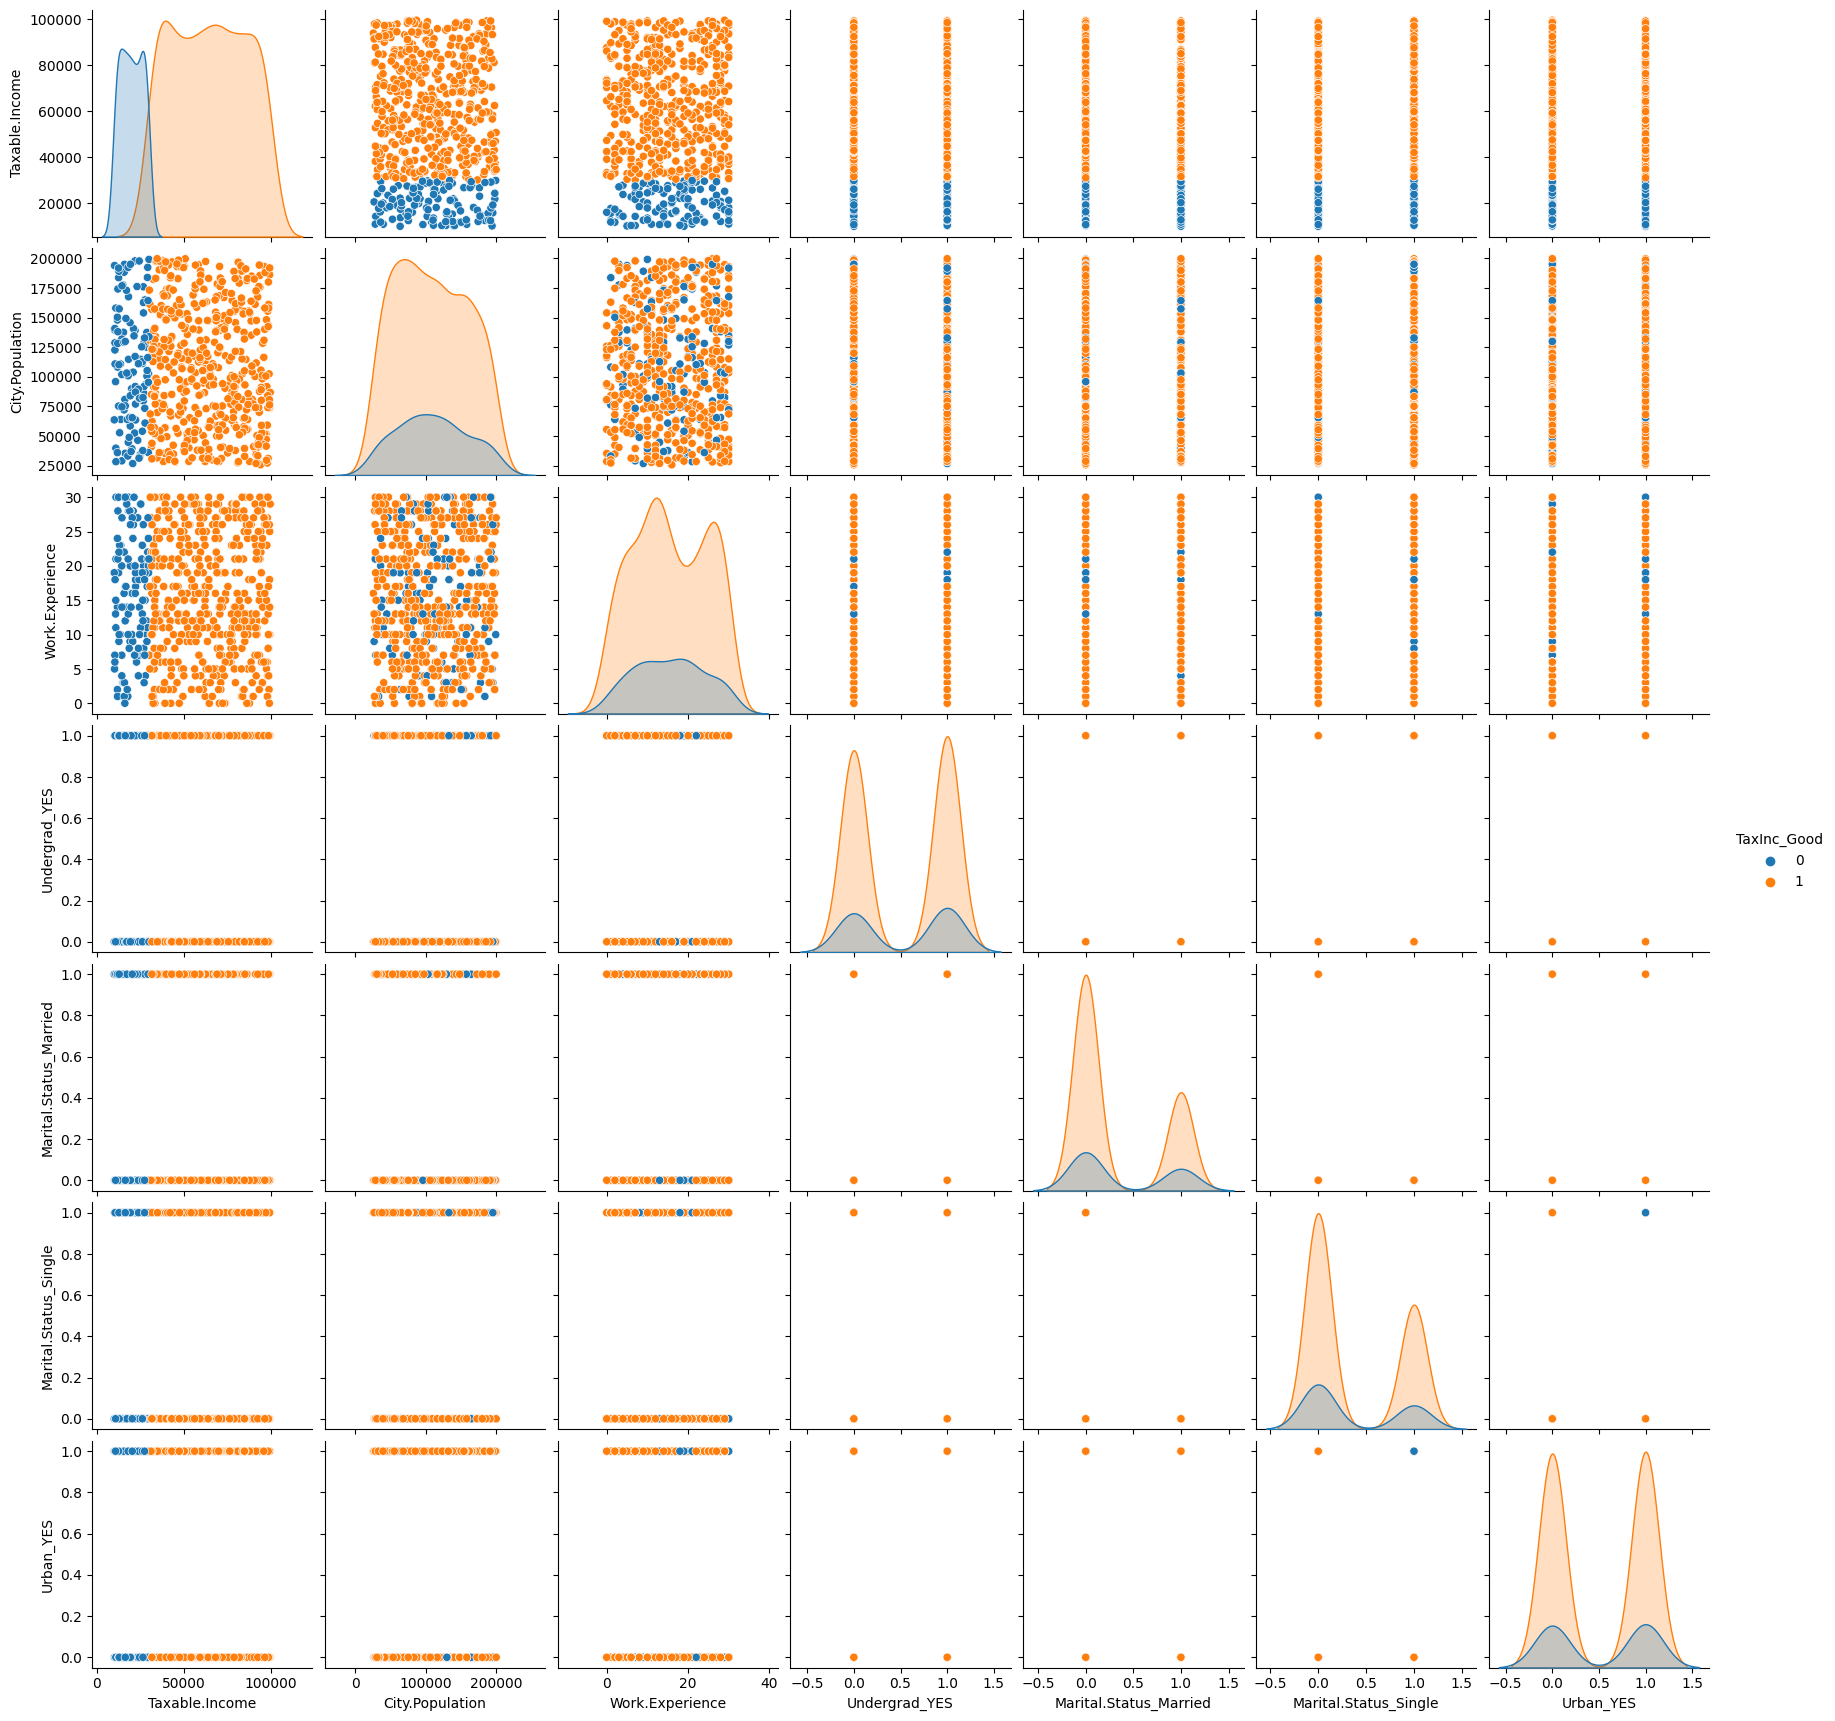

In [ ]:
# Visualization
# pairplot
sns.pairplot(data = fraud, hue='TaxInc_Good')

In [ ]:
# Normalization funcition
def norm_func(i):
  x = (i-i.min())/(i.max()-i.min())
  return(x)

In [ ]:
# Normalized data frame
fraud_norm = norm_func(fraud.iloc[:,1:])
fraud_norm.tail(10)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,1.0
591,0.615406,0.600000,1.0,0.0,1.0,1.0,0.0
592,0.283703,0.533333,1.0,0.0,1.0,0.0,1.0
593,0.610256,0.333333,0.0,0.0,0.0,1.0,1.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0,1.0
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Declaring features & target
X = fraud_norm.drop(['TaxInc_Good'], axis=1)
Y = fraud_norm['TaxInc_Good']

In [ ]:
#Splitting data into train & test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
##Converting the Taxable income variable to bucketing.
fraud_norm["income"]="<=30000"
fraud_norm.loc[fraud["Taxable.Income"]>=30000,"income"]="Good"
fraud_norm.loc[fraud["Taxable.Income"]<=30000,"income"]="Risky"

In [ ]:
##Droping the Taxable income variable
fraud.drop(["Taxable.Income"],axis=1,inplace=True)

In [ ]:
# rename the colname
fraud.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)


In [ ]:
le=preprocessing.LabelEncoder()
for column_name in  fraud.columns:
    if fraud[column_name].dtype == object:
         fraud[column_name] = le.fit_transform( fraud[column_name])
    else:
        pass

In [ ]:
# Splitting the data into featuers and labels
features = fraud.iloc[:,0:5]
labels = fraud.iloc[:,5]

In [ ]:
## Collecting the column names
colnames = list(fraud.columns)
predictors = colnames[0:5]
target = colnames[5]


In [ ]:
# Splitting the data into train and test
X_train,X_test,Y_train,Y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)


## Building Decision Tree Classifier using Entropy Criteria

In [ ]:
model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model2.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.875, 'x[1] <= 5.5\nentropy = 1.0\nsamples = 480\nvalue = [238, 242]'),
 Text(0.25, 0.625, 'x[1] <= 3.5\nentropy = 0.923\nsamples = 68\nvalue = [23, 45]'),
 Text(0.125, 0.375, 'x[1] <= 1.5\nentropy = 0.976\nsamples = 44\nvalue = [18, 26]'),
 Text(0.0625, 0.125, 'entropy = 0.811\nsamples = 20\nvalue = [5, 15]'),
 Text(0.1875, 0.125, 'entropy = 0.995\nsamples = 24\nvalue = [13, 11]'),
 Text(0.375, 0.375, 'x[0] <= 145639.0\nentropy = 0.738\nsamples = 24\nvalue = [5, 19]'),
 Text(0.3125, 0.125, 'entropy = 0.896\nsamples = 16\nvalue = [5, 11]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.75, 0.625, 'x[0] <= 98165.0\nentropy = 0.999\nsamples = 412\nvalue = [215, 197]'),
 Text(0.625, 0.375, 'x[0] <= 50033.5\nentropy = 0.998\nsamples = 195\nvalue = [92, 103]'),
 Text(0.5625, 0.125, 'entropy = 0.971\nsamples = 65\nvalue = [39, 26]'),
 Text(0.6875, 0.125, 'entropy = 0.975\nsamples = 130\nvalue = [53, 77]'),
 Text(0.875, 0.375, 'x[4] <= 0.5\nentropy = 

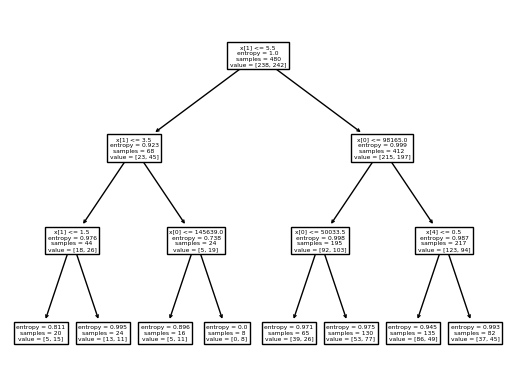

In [ ]:
# plot the decision tree
tree.plot_tree(model2)

In [ ]:
colnames

['population',
 'experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good']

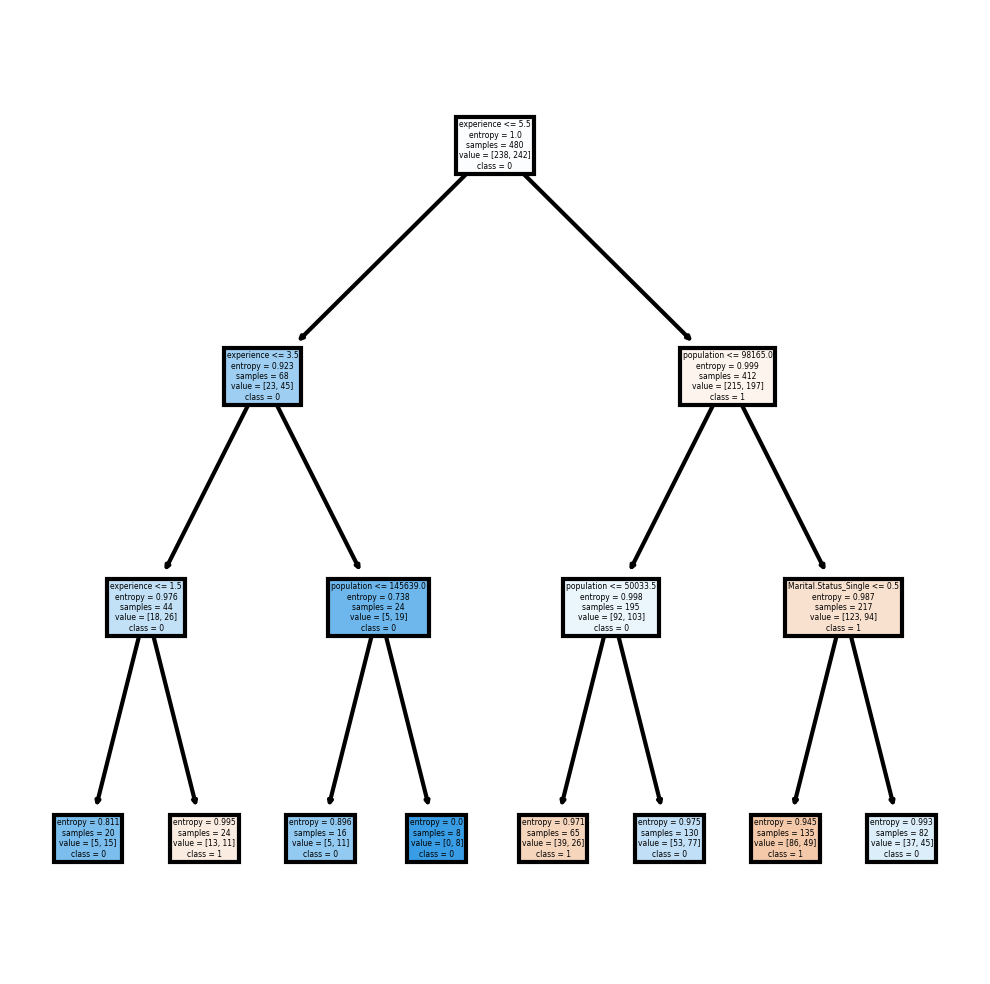

In [ ]:
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model2,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [ ]:
# predicting on test data
preds =  model2.predict(X_test)  # predicting test data set
pd.Series(preds).value_counts() # getting count of each category

1    64
0    56
dtype: int64

In [ ]:
preds

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1], dtype=uint8)

In [ ]:
pd.crosstab(Y_test, preds)

col_0,0,1
Urban_YES,,
0,28,32
1,28,32


In [ ]:
# Accuracy
np.mean(preds == Y_test)

0.5

## Building Decision Tree Classifier (CART) using Gini Criteria

In [ ]:
model2_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [ ]:
model2_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
# prediction and computing the accuracy
pred2 = model2.predict(X_test)
np.mean(preds == Y_test)

0.5

## Decision tree regression example

In [ ]:
# Decision Tree Regression
array = fraud.values
X = array[:, 0:3]
Y = array[:, 3]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

In [ ]:
model2 = DecisionTreeRegressor()
model2.fit(X_train, Y_train)

DecisionTreeRegressor()

In [ ]:
# Find accuracy
model2.score(X_test, Y_test)

-0.8701026119402988